In [1]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
import string
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score,confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

[nltk_data] Downloading package punkt to C:\Users\This
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
encodings = ['utf-8','latin1', 'ISO-8859-1', 'cp1252']
file_path = "spam.csv"
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding = encoding)
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding:{encoding}")
        continue
        
if'df' in locals():
    print("CSV File has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

Failed to read with encoding:utf-8
File successfully read with encoding: latin1
CSV File has been successfully loaded.


In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['v1']= encoder.fit_transform(df['v1'])

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace=True)

In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

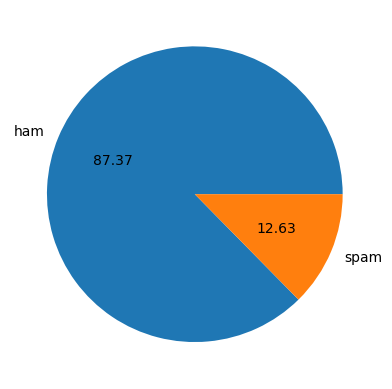

In [16]:
plt.pie(df['v1'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show

In [17]:
#Adding a column of numbers of charachters,words and sentences in each msg
df['num_characters']= df['v2'].apply(len)

C:\Users\This pc\AppData\Local\Temp\ipykernel_4868\6110946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['v2'].apply(len)


In [18]:
df["num_Words"]=df.apply(lambda row: nltk.word_tokenize(row["v2"]), axis=1).apply(len)
df["num_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["v2"]), axis=1).apply(len)


C:\Users\This pc\AppData\Local\Temp\ipykernel_4868\4001064374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_Words"]=df.apply(lambda row: nltk.word_tokenize(row["v2"]), axis=1).apply(len)
C:\Users\This pc\AppData\Local\Temp\ipykernel_4868\4001064374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["v2"]), axis=1).apply(len)


In [19]:
df.head()

,v1,v2,num_characters,num_Words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
#Dropping the outliers. 
df = df[(df["num_characters"]<350)]
df.shape


(5149, 5)

In [21]:
df[['num_characters','num_Words','num_sentence']].describe()

,num_characters,num_Words,num_sentence
count,5149.000000,5149.000000,5149.000000
mean,77.399883,18.064090,1.922315
std,51.753175,11.532048,1.257064
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,115.000000,26.000000,2.000000
max,338.000000,90.000000,11.000000


In [22]:
#Ham
df[df['v1']==0][['num_characters','num_Words','num_sentence']].describe()

,num_characters,num_Words,num_sentence
count,4496.000000,4496.000000,4496.000000
mean,68.614101,16.669262,1.770463
std,48.238487,11.394681,1.144034
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,89.000000,22.000000,2.000000
max,338.000000,90.000000,11.000000


In [23]:
#Spam
df[df['v1']==1][['num_characters','num_Words','num_sentence']].describe()

,num_characters,num_Words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [24]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
df["v1"] = label_encoder.fit_transform(df["v1"])

<Axes: xlabel='num_characters', ylabel='Count'>

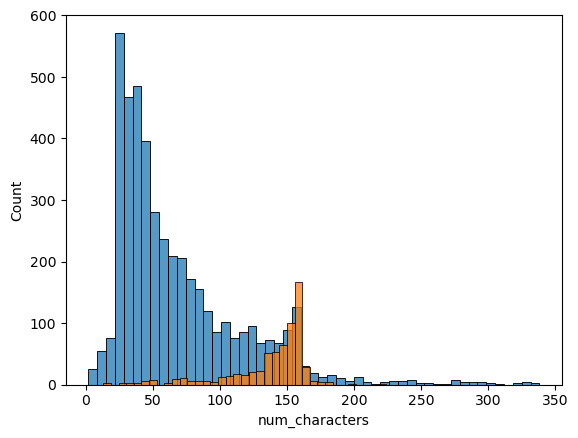

In [25]:
sns.histplot(df[df['v1']==0]['num_characters'])
sns.histplot(df[df['v1']==1]['num_characters'])

<Axes: xlabel='num_Words', ylabel='Count'>

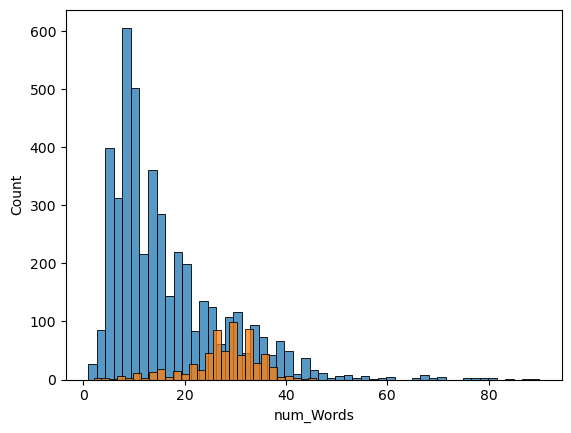

In [26]:
sns.histplot(df[df['v1']==0]['num_Words'])
sns.histplot(df[df['v1']==1]['num_Words'])

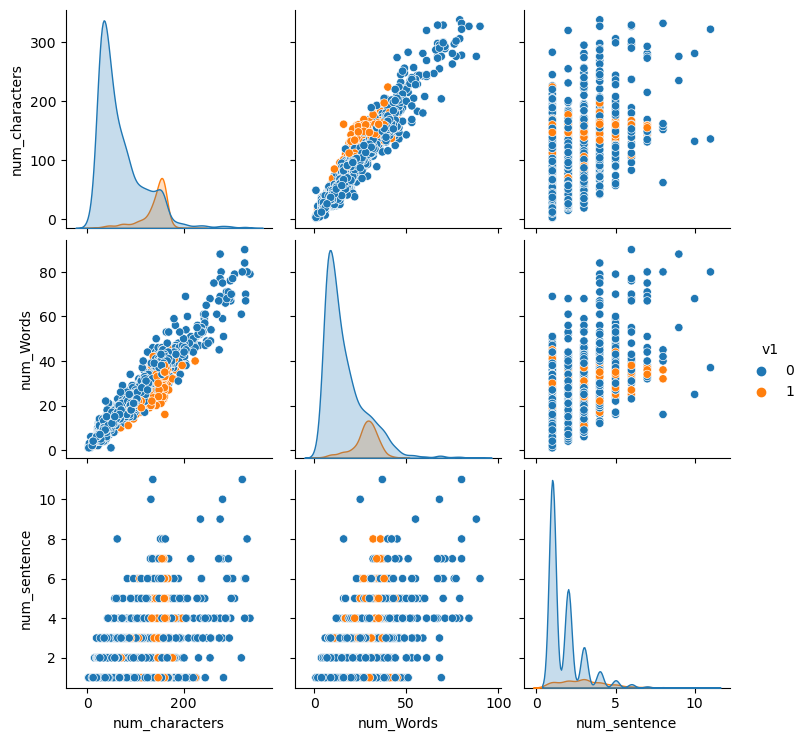

In [27]:
sns.pairplot(df,hue='v1')

C:\Users\This pc\AppData\Local\Temp\ipykernel_4868\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

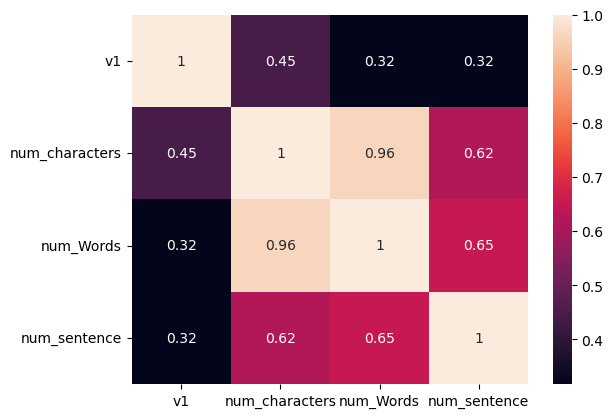

In [28]:
sns.heatmap(df.corr(),annot = True)

In [29]:
ps = PorterStemmer()

In [30]:
def transformed_v2(v2):
    v2 = nltk.word_tokenize(v2)
    
    y = []
    for i in v2:
        if i.isalnum():
            y.append(i)
            
    v2 = y[:]
    y.clear()
    
    for i in v2:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    v2 = y[:]
    y.clear()
    for i in v2:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [31]:
transformed_v2('Hi how Are you Nitish?')

'hi are nitish'

In [32]:
df['v2'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [33]:
df['transformed_v2']=df['v2'].apply(transformed_v2)

In [34]:
df.head()

,v1,v2,num_characters,num_Words,num_sentence,transformed_v2
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [35]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

Defaulting to user installation because normal site-packages is not writeable


In [36]:
spam_wc = wc.generate(df[df['v1']==1]['transformed_v2'].str.cat(sep=" "))

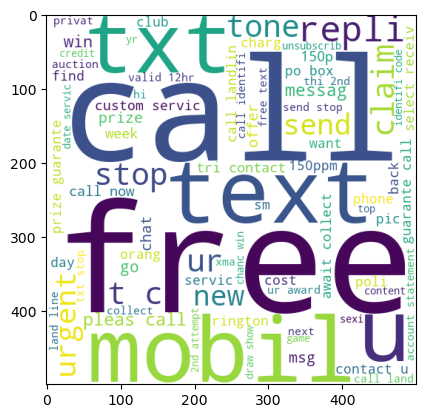

In [37]:
plt.figure()
plt.imshow(spam_wc)

In [38]:
ham_wc = wc.generate(df[df['v1']==0]['transformed_v2'].str.cat(sep=" "))

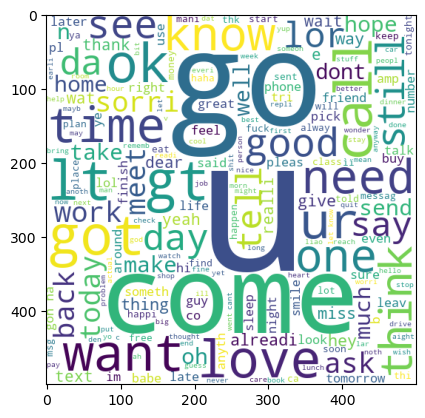

In [39]:
plt.figure()
plt.imshow(ham_wc)

In [40]:
df.head()

,v1,v2,num_characters,num_Words,num_sentence,transformed_v2
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [41]:
spam_corpus = []
for msg in df[df['v1']==1]['transformed_v2']:
    for word in msg.split():
        spam_corpus.append(word)
 

In [42]:
len(spam_corpus)

10847

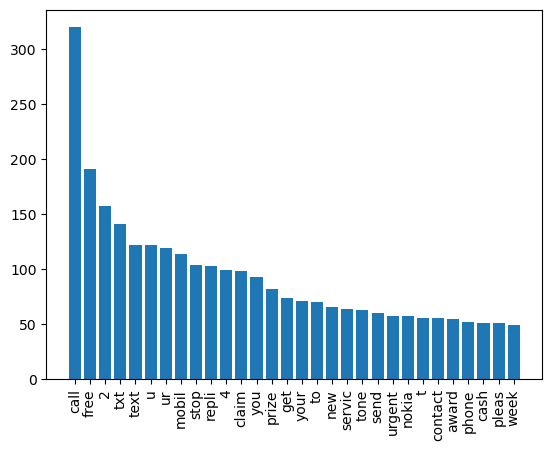

In [43]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus = []
for msg in df[df['v1']==0]['transformed_v2']:
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

39730

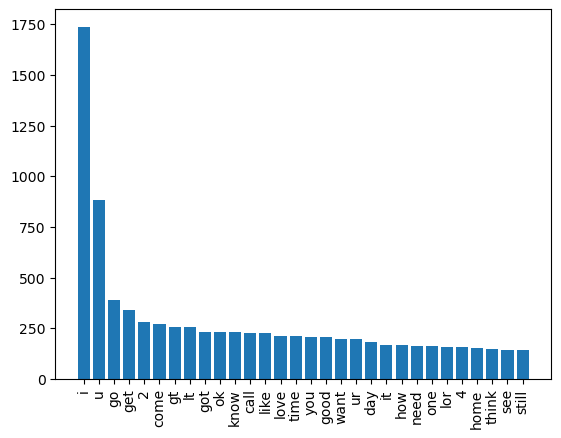

In [46]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_v2']).toarray()

In [48]:
X.shape


(5149, 6751)

In [49]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
Y = df["v1"] 
# Splitting the testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [50]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, Y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}


In [51]:
#Crossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,Y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


NaiveBayes: 0.973292 
RandomForest: 0.967711 
KNeighbours: 0.909447 
SVC: 0.969651 


In [53]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(Y_test, pred_test)
    recal = metrics.recall_score(Y_test, pred_test)
    f1_s = metrics.f1_score(Y_test, pred_test)
    train_accuracy = model.score(X_train,Y_train)
    test_accuracy = model.score(X_test,Y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [54]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])


In [55]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.934426,0.926829,0.930612,0.972816,0.995387
RandomForest,0.989796,0.788618,0.877828,0.972816,0.995387
KNeighbours,1.000000,0.284553,0.443038,0.972816,0.995387
SVC,1.000000,0.772358,0.871560,0.972816,0.995387


In [56]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5149, dtype: object

In [57]:
tfidf = TfidfVectorizer()

In [117]:
x = tfidf.fit_transform(df['transformed_v2']).toarray()

In [118]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
Y = df["v1"] 
# Splitting the testing and training sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=2)

In [ ]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(x_train, Y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}


In [ ]:
#Crossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, x_train,Y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

In [ ]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(x_train)
    pred_test = i.predict(x_test)
    prec = metrics.precision_score(Y_test, pred_test)
    recal = metrics.recall_score(Y_test, pred_test)
    f1_s = metrics.f1_score(Y_test, pred_test)
    train_accuracy = model.score(x_train,Y_train)
    test_accuracy = model.score(x_test,Y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [ ]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

In [ ]:
df['transformed_v2']

In [ ]:
cmap = ListedColormap(["#E1F16B", "#E598D8"])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
con_matrix = confusion_matrix(Y_test,pred_test)
for cls, ax in zip(classifiers, axes.flatten()):
    sns.heatmap(con_matrix,  
                ax=ax, 
                cmap= cmap,   
                )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [116]:
sample = input(['%%!Enter a message'])
data = tfidf.fit_transform(sample)
prediction = model.predict(data)

['%%!Enter a message']go jurong point crazi avail bugi n great world


ValueError: Iterable over raw text documents expected, string object received.